In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [0]:
# (1)	Load the input file game_data.csv to DataBricks platform

df = spark.read.options(header='True', inferSchema='True', delimiter=',').csv("/FileStore/tables/gamedata.csv")

In [0]:
df.show()

+-----+------+-----+----------+--------------------+------+-------------+
 char| level| race| charclass| zone| guild| timestamp|
+-----+------+-----+----------+--------------------+------+-------------+
59425| 1| Orc| Rogue| Orgrimmar| 165|1/1/2008 0:02|
65494| 9| Orc| Hunter| Durotar| -1|1/1/2008 0:02|
65325| 14| Orc| Warrior| Ghostlands| -1|1/1/2008 0:02|
65490| 18| Orc| Hunter| Ghostlands| -1|1/1/2008 0:02|
 2288| 60| Orc| Hunter| Hellfire Peninsula| -1|1/1/2008 0:02|
 2289| 60| Orc| Hunter| Hellfire Peninsula| -1|1/1/2008 0:02|
61239| 68| Orc| Hunter|Blade's Edge Moun...| 243|1/1/2008 0:02|
59772| 69| Orc| Warrior| Shadowmoon Valley| 35|1/1/2008 0:02|
22937| 69| Orc| Rogue| Warsong Gulch| 243|1/1/2008 0:02|
23062| 69| Orc| Shaman| Shattrath City| 103|1/1/2008 0:02|
48432| 70| Orc| Warrior|Blade's Edge Moun...| 79|1/1/2008 0:02|
 582| 70| Orc| Warrior| Sethekk Halls| 19|1/1/2008 0:02|
33256| 70| Orc| Warrior| Orgrimmar| 53|1/1/2008 0:02|
22307| 70| Orc| Warrior| Orgrimmar| 174|1/1/2008 0:02|
22466| 70| Orc| Warrior| Undercity| 101|1/1/2008 0:02|
 1003| 70| Orc| Warrior| Tirisfal Glades| 204|1/1/2008 0:02|
 62| 70| Orc| Warrior| Shattrath City| 5|1/1/2008 0:02|
 2663| 70| Orc| Warrior| Shattrath City| 53|1/1/2008 0:02|
49944| 70| Orc| Warrior| Terokkar Forest| 167|1/1/2008 0:02|
10223| 70| Orc| Warrior| Netherstorm| 5|1/1/2008 0:02|
+-----+------+-----+----------+--------------------+------+-------------+
only showing top 20 rows

In [0]:
df = df.withColumnRenamed("char","player") \
    .withColumnRenamed(" level","level") \
    .withColumnRenamed(" race","race") \
    .withColumnRenamed(" charclass","class") \
    .withColumnRenamed(" zone","zone") \
    .withColumnRenamed(" guild","guild") \
    .withColumnRenamed(" timestamp","timestamps")

In [0]:
df.printSchema()

root
-- player: integer (nullable = true)
-- level: integer (nullable = true)
-- race: string (nullable = true)
-- class: string (nullable = true)
-- zone: string (nullable = true)
-- guild: integer (nullable = true)
-- timestamps: string (nullable = true)

In [0]:
# (3)	Apply regex to replace the Chinese characters from zone column  Dalaran競技場 to Dalaran Arena

from pyspark.sql.functions import regexp_replace

df.withColumn("zone", regexp_replace("zone","Dalaran競技場", "Dalaran Arena")).show()

+------+-----+----+-------+--------------------+-----+-------------+
player|level|race| class| zone|guild| timestamps|
+------+-----+----+-------+--------------------+-----+-------------+
 59425| 1| Orc| Rogue| Orgrimmar| 165|1/1/2008 0:02|
 65494| 9| Orc| Hunter| Durotar| -1|1/1/2008 0:02|
 65325| 14| Orc|Warrior| Ghostlands| -1|1/1/2008 0:02|
 65490| 18| Orc| Hunter| Ghostlands| -1|1/1/2008 0:02|
 2288| 60| Orc| Hunter| Hellfire Peninsula| -1|1/1/2008 0:02|
 2289| 60| Orc| Hunter| Hellfire Peninsula| -1|1/1/2008 0:02|
 61239| 68| Orc| Hunter|Blade's Edge Moun...| 243|1/1/2008 0:02|
 59772| 69| Orc|Warrior| Shadowmoon Valley| 35|1/1/2008 0:02|
 22937| 69| Orc| Rogue| Warsong Gulch| 243|1/1/2008 0:02|
 23062| 69| Orc| Shaman| Shattrath City| 103|1/1/2008 0:02|
 48432| 70| Orc|Warrior|Blade's Edge Moun...| 79|1/1/2008 0:02|
 582| 70| Orc|Warrior| Sethekk Halls| 19|1/1/2008 0:02|
 33256| 70| Orc|Warrior| Orgrimmar| 53|1/1/2008 0:02|
 22307| 70| Orc|Warrior| Orgrimmar| 174|1/1/2008 0:02|
 22466| 70| Orc|Warrior| Undercity| 101|1/1/2008 0:02|
 1003| 70| Orc|Warrior| Tirisfal Glades| 204|1/1/2008 0:02|
 62| 70| Orc|Warrior| Shattrath City| 5|1/1/2008 0:02|
 2663| 70| Orc|Warrior| Shattrath City| 53|1/1/2008 0:02|
 49944| 70| Orc|Warrior| Terokkar Forest| 167|1/1/2008 0:02|
 10223| 70| Orc|Warrior| Netherstorm| 5|1/1/2008 0:02|
+------+-----+----+-------+--------------------+-----+-------------+
only showing top 20 rows

In [0]:
# (4)	Apply regex to remove the data which contains null. Use Try catch while reading the data.

try:
    df.filter(df["class"].rlike("^$")).drop().show()
except:
    print("Error Handled")
 

+------+-----+----+-----+----+-----+----------+
player|level|race|class|zone|guild|timestamps|
+------+-----+----+-----+----+-----+----------+
+------+-----+----+-----+----+-----+----------+

In [0]:
# (5)	Using timestamps column, create two columns named date, time which has time transformation to store date and time separately in these columns

from pyspark.sql.functions import split

split_dt = split(df.timestamps, ' ')
df = df.withColumn('date', split_dt.getItem(0))
df = df.withColumn('time', split_dt.getItem(1))

df.show(5)

+------+-----+----+-------+------------------+-----+-------------+--------+----+
player|level|race| class| zone|guild| timestamps| date|time|
+------+-----+----+-------+------------------+-----+-------------+--------+----+
 59425| 1| Orc| Rogue| Orgrimmar| 165|1/1/2008 0:02|1/1/2008|0:02|
 65494| 9| Orc| Hunter| Durotar| -1|1/1/2008 0:02|1/1/2008|0:02|
 65325| 14| Orc|Warrior| Ghostlands| -1|1/1/2008 0:02|1/1/2008|0:02|
 65490| 18| Orc| Hunter| Ghostlands| -1|1/1/2008 0:02|1/1/2008|0:02|
 2288| 60| Orc| Hunter|Hellfire Peninsula| -1|1/1/2008 0:02|1/1/2008|0:02|
+------+-----+----+-------+------------------+-----+-------------+--------+----+
only showing top 5 rows

In [0]:
# 6.(a)	number of players on level >60 group by zone

df.filter(df.level>60).groupBy(df.zone).count().show()

+--------------------+-----+
 zone|count|
+--------------------+-----+
Auchindoun: Shado...| 360|
 Auchenai Crypts| 260|
 Zul'Farrak| 69|
 Blackfathom Deeps| 44|
 The Barrens| 197|
 Desolace| 32|
 Scarlet Monastery| 105|
 Deadwind Pass| 164|
 Loch Modan| 4|
 Thunder Bluff| 254|
 Searing Gorge| 13|
 Azshara| 52|
Old Hillsbrad Foo...| 86|
 The Arcatraz| 212|
 Wetlands| 7|
 Ashenvale| 86|
 Blackrock Mountain| 8|
 The Mechanar| 932|
 Elwynn Forest| 3|
 Karazhan| 1420|
+--------------------+-----+
only showing top 20 rows

In [0]:
# 6(b)	display the players who have guild between -1 to 

df.filter(df.guild.between(-1, 5)).show()

+------+-----+------+-------+------------------+-----+-------------+--------+----+
player|level| race| class| zone|guild| timestamps| date|time|
+------+-----+------+-------+------------------+-----+-------------+--------+----+
 65494| 9| Orc| Hunter| Durotar| -1|1/1/2008 0:02|1/1/2008|0:02|
 65325| 14| Orc|Warrior| Ghostlands| -1|1/1/2008 0:02|1/1/2008|0:02|
 65490| 18| Orc| Hunter| Ghostlands| -1|1/1/2008 0:02|1/1/2008|0:02|
 2288| 60| Orc| Hunter|Hellfire Peninsula| -1|1/1/2008 0:02|1/1/2008|0:02|
 2289| 60| Orc| Hunter|Hellfire Peninsula| -1|1/1/2008 0:02|1/1/2008|0:02|
 62| 70| Orc|Warrior| Shattrath City| 5|1/1/2008 0:02|1/1/2008|0:02|
 10223| 70| Orc|Warrior| Netherstorm| 5|1/1/2008 0:02|1/1/2008|0:02|
 25501| 70| Orc| Hunter| Shadowmoon Valley| -1|1/1/2008 0:02|1/1/2008|0:02|
 53| 70| Orc| Hunter| Warsong Gulch| 5|1/1/2008 0:02|1/1/2008|0:02|
 19050| 70| Orc| Hunter| Tirisfal Glades| -1|1/1/2008 0:02|1/1/2008|0:02|
 64| 70| Orc| Hunter| Shattrath City| 5|1/1/2008 0:02|1/1/2008|0:02|
 7127| 70| Orc| Hunter| The Steamvault| 5|1/1/2008 0:02|1/1/2008|0:02|
 4002| 70| Orc| Hunter| The Mechanar| 5|1/1/2008 0:02|1/1/2008|0:02|
 64297| 48|Tauren|Warrior| Tanaris| -1|1/1/2008 0:02|1/1/2008|0:02|
 62023| 49|Tauren| Shaman| Warsong Gulch| -1|1/1/2008 0:02|1/1/2008|0:02|
 65549| 4|Tauren| Druid| Mulgore| -1|1/1/2008 0:02|1/1/2008|0:02|
 55787| 19|Tauren| Druid| The Barrens| -1|1/1/2008 0:02|1/1/2008|0:02|
 31524| 53|Tauren|Warrior| Feralas| -1|1/1/2008 0:02|1/1/2008|0:02|
 41715| 64|Tauren|Warrior| Zangarmarsh| -1|1/1/2008 0:02|1/1/2008|0:02|
 37029| 70|Tauren|Warrior| Orgrimmar| -1|1/1/2008 0:02|1/1/2008|0:02|
+------+-----+------+-------+------------------+-----+-------------+--------+----+
only showing top 20 rows

In [0]:
# 6(c)	The list of players who are in class Hunter, in Shadowmoon Valley zone having level>60

df.filter((df['level']>60) & (df['class']=="Hunter") & (df['zone']=="Shadowmoon Valley")).show()

+------+-----+---------+------+-----------------+-----+-------------+--------+----+
player|level| race| class| zone|guild| timestamps| date|time|
+------+-----+---------+------+-----------------+-----+-------------+--------+----+
 1379| 70| Orc|Hunter|Shadowmoon Valley| 53|1/1/2008 0:02|1/1/2008|0:02|
 44477| 70| Orc|Hunter|Shadowmoon Valley| 167|1/1/2008 0:02|1/1/2008|0:02|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 0:02|1/1/2008|0:02|
 52549| 70|Blood Elf|Hunter|Shadowmoon Valley| 103|1/1/2008 0:05|1/1/2008|0:05|
 1379| 70| Orc|Hunter|Shadowmoon Valley| 53|1/1/2008 0:12|1/1/2008|0:12|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 0:12|1/1/2008|0:12|
 52549| 70|Blood Elf|Hunter|Shadowmoon Valley| 103|1/1/2008 0:15|1/1/2008|0:15|
 1379| 70| Orc|Hunter|Shadowmoon Valley| 53|1/1/2008 0:22|1/1/2008|0:22|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 0:22|1/1/2008|0:22|
 52549| 70|Blood Elf|Hunter|Shadowmoon Valley| 103|1/1/2008 0:26|1/1/2008|0:26|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 0:32|1/1/2008|0:32|
 52549| 70|Blood Elf|Hunter|Shadowmoon Valley| 103|1/1/2008 0:35|1/1/2008|0:35|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 0:42|1/1/2008|0:42|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 0:52|1/1/2008|0:52|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 1:02|1/1/2008|1:02|
 52549| 70|Blood Elf|Hunter|Shadowmoon Valley| 103|1/1/2008 1:06|1/1/2008|1:06|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 1:12|1/1/2008|1:12|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 1:22|1/1/2008|1:22|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 1:32|1/1/2008|1:32|
 25501| 70| Orc|Hunter|Shadowmoon Valley| -1|1/1/2008 1:42|1/1/2008|1:42|
+------+-----+---------+------+-----------------+-----+-------------+--------+----+
only showing top 20 rows

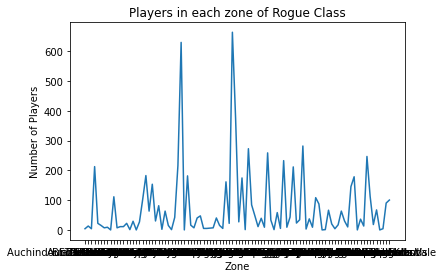

In [0]:
# 6(d)	Use python graph plotting to show count of players in each zone which are in class Rogue such that, the count of players is Y-axis and zone is X-axis

import matplotlib.pyplot as plt

data = df.filter(df['class']=='Rogue').groupBy(df['zone']).count()

x = data.select('zone').rdd.flatMap(lambda x: x).collect()
y = data.select('count').rdd.flatMap(lambda x: x).collect()

plt.plot(x, y)

plt.xlabel('Zone')
plt.ylabel('Number of Players')

plt.title('Players in each zone of Rogue Class')

plt.show()


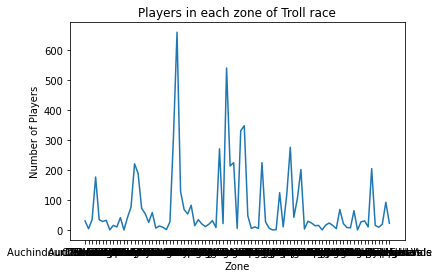

In [0]:
# 6(e)	Use python graph plotting to show count of players in each zone which are in race Troll such that, the count of players is Y-axis and zone is X-axis 

import matplotlib.pyplot as plt

data = df.filter(df['race']=='Troll').groupBy(df['zone']).count()

x = data.select('zone').rdd.flatMap(lambda x: x).collect()
y = data.select('count').rdd.flatMap(lambda x: x).collect()

plt.plot(x, y)

plt.xlabel('Zone')
plt.ylabel('Number of Players')

plt.title('Players in each zone of Troll race')

plt.show()


In [0]:
# (f)	Plot a figure of kind donut pie to show the player’s race preference such that for each unique player, group by race such that when we hover on each tile we see count and %

df.groupBy(df['race']).count().display()

race,count
Undead,16498
Troll,6605
Tauren,13613
Blood Elf,23090
Orc,5729


In [0]:
data = df.groupBy(df['class']).count().display()

class,count
Druid,5532
Priest,7400
Hunter,9603
Rogue,7089
Paladin,6804
Mage,9203
Shaman,3977
Warrior,7362
Warlock,8565


In [0]:
# 6(h)	check if we got information on every single day of 2008, if not then list the days which have missing player activity in DD/MM/YYY format

import pandas as pd
result = pd.Series(pd.date_range('2008-01-01', periods=366, freq='D'))

dtGrp = df.groupBy(df['date']).count()
dates = dtGrp.select('date').rdd.flatMap(lambda x: x).collect()

for date in result:
    if date not in pd.to_datetime(dates, dayfirst=True):
        print(date)

2008-01-03 00:00:00
2008-01-04 00:00:00
2008-01-05 00:00:00
2008-01-06 00:00:00
2008-01-07 00:00:00
2008-01-08 00:00:00
2008-01-09 00:00:00
2008-01-10 00:00:00
2008-01-11 00:00:00
2008-01-12 00:00:00
2008-01-13 00:00:00
2008-01-14 00:00:00
2008-01-15 00:00:00
2008-01-16 00:00:00
2008-01-17 00:00:00
2008-01-18 00:00:00
2008-01-19 00:00:00
2008-01-20 00:00:00
2008-01-21 00:00:00
2008-01-22 00:00:00
2008-01-23 00:00:00
2008-01-24 00:00:00
2008-01-25 00:00:00
2008-01-26 00:00:00
2008-01-27 00:00:00
2008-01-28 00:00:00
2008-01-29 00:00:00
2008-01-30 00:00:00
2008-01-31 00:00:00
2008-02-01 00:00:00
2008-02-02 00:00:00
2008-02-03 00:00:00
2008-02-04 00:00:00
2008-02-05 00:00:00
2008-02-06 00:00:00
2008-02-07 00:00:00
2008-02-08 00:00:00
2008-02-09 00:00:00
2008-02-10 00:00:00
2008-02-11 00:00:00
2008-02-12 00:00:00
2008-02-13 00:00:00
2008-02-14 00:00:00
2008-02-15 00:00:00
2008-02-16 00:00:00
2008-02-17 00:00:00
2008-02-18 00:00:00
2008-02-19 00:00:00
2008-02-20 00:00:00
2008-02-21 00:00:00
2008-02-22 00:00:00
2008-02-23 00:00:00
2008-02-24 00:00:00
2008-02-25 00:00:00
2008-02-26 00:00:00
2008-02-27 00:00:00
2008-02-28 00:00:00
2008-02-29 00:00:00
2008-03-01 00:00:00
2008-03-02 00:00:00
2008-03-03 00:00:00
2008-03-04 00:00:00
2008-03-05 00:00:00
2008-03-06 00:00:00
2008-03-07 00:00:00
2008-03-08 00:00:00
2008-03-09 00:00:00
2008-03-10 00:00:00
2008-03-11 00:00:00
2008-03-12 00:00:00
2008-03-13 00:00:00
2008-03-14 00:00:00
2008-03-15 00:00:00
2008-03-16 00:00:00
2008-03-17 00:00:00
2008-03-18 00:00:00
2008-03-19 00:00:00
2008-03-20 00:00:00
2008-03-21 00:00:00
2008-03-22 00:00:00
2008-03-23 00:00:00
2008-03-24 00:00:00
2008-03-25 00:00:00
2008-03-26 00:00:00
2008-03-27 00:00:00
2008-03-28 00:00:00
2008-03-29 00:00:00
2008-03-30 00:00:00
2008-03-31 00:00:00
2008-04-01 00:00:00
2008-04-02 00:00:00
2008-04-03 00:00:00
2008-04-04 00:00:00
2008-04-05 00:00:00
2008-04-06 00:00:00
2008-04-07 00:00:00
2008-04-08 00:00:00
2008-04-09 00:00:00
2008-04-10 00:00:00
2008-04-11 00:00:00
2008-04-12 00:00:00
2008-04-13 00:00:00
2008-04-14 00:00:00
2008-04-15 00:00:00
2008-04-16 00:00:00
2008-04-17 00:00:00
2008-04-18 00:00:00
2008-04-19 00:00:00
2008-04-20 00:00:00
2008-04-21 00:00:00
2008-04-22 00:00:00
2008-04-23 00:00:00
2008-04-24 00:00:00
2008-04-25 00:00:00
2008-04-26 00:00:00
2008-04-27 00:00:00
2008-04-28 00:00:00
2008-04-29 00:00:00
2008-04-30 00:00:00
2008-05-01 00:00:00
2008-05-02 00:00:00
2008-05-03 00:00:00
2008-05-04 00:00:00
2008-05-05 00:00:00
2008-05-06 00:00:00
2008-05-07 00:00:00
2008-05-08 00:00:00
2008-05-09 00:00:00
2008-05-10 00:00:00
2008-05-11 00:00:00
2008-05-12 00:00:00
2008-05-13 00:00:00
2008-05-14 00:00:00
2008-05-15 00:00:00
2008-05-16 00:00:00
2008-05-17 00:00:00
2008-05-18 00:00:00
2008-05-19 00:00:00
2008-05-20 00:00:00
2008-05-21 00:00:00
2008-05-22 00:00:00
2008-05-23 00:00:00
2008-05-24 00:00:00
2008-05-25 00:00:00
2008-05-26 00:00:00
2008-05-27 00:00:00
2008-05-28 00:00:00
2008-05-29 00:00:00
2008-05-30 00:00:00
2008-05-31 00:00:00
2008-06-01 00:00:00
2008-06-02 00:00:00
2008-06-03 00:00:00
2008-06-04 00:00:00
2008-06-05 00:00:00
2008-06-06 00:00:00
2008-06-07 00:00:00
2008-06-08 00:00:00
2008-06-09 00:00:00
2008-06-10 00:00:00
2008-06-11 00:00:00
2008-06-12 00:00:00
2008-06-13 00:00:00
2008-06-14 00:00:00
2008-06-15 00:00:00
2008-06-16 00:00:00
2008-06-17 00:00:00
2008-06-18 00:00:00
2008-06-19 00:00:00
2008-06-20 00:00:00
2008-06-21 00:00:00
2008-06-22 00:00:00
2008-06-23 00:00:00
2008-06-24 00:00:00
2008-06-25 00:00:00
2008-06-26 00:00:00
2008-06-27 00:00:00
2008-06-28 00:00:00
2008-06-29 00:00:00
2008-06-30 00:00:00
2008-07-01 00:00:00
2008-07-02 00:00:00
2008-07-03 00:00:00
2008-07-04 00:00:00
2008-07-05 00:00:00
2008-07-06 00:00:00
2008-07-07 00:00:00
2008-07-08 00:00:00
2008-07-09 00:00:00
2008-07-10 00:00:00
2008-07-11 00:00:00
2008-07-12 00:00:00
2008-07-13 00:00:00
2008-07-14 00:00:00
2008-07-15 00:00:00
2008-07-16 00:00:00
2008-07-17 00:00:00
2008-07-18 00:00:00
2008-07-19 00:00:00
2008-07-20 00:00:00


In [0]:
# 6(i)	Display the difference in player’s activity throughout the year between different levels in graph. Group the levels 1-15, 15-60, 60-70, 70-80 from stating of the year excluding the missing dates. Display count of players in y axis, and months on x axis. On hover, display the date (dd-mm-yyyy) and count of players.

l = []
res = []

data = df.select(df.level, df.timestamps).orderBy(df.timestamps)
for i in data.collect():
   l.append(list(i))
for lst in l:
    sublst = []
    lvl = f"{(lst[0]//15)*15}-{((lst[0]//15)*15)+15}"
    sublst.append(lvl)
    sublst.append(lst[1])
    res.append(list(sublst))

schema = ['range', 'timestamps']

chartDF = spark.createDataFrame(res, schema)

chartDF.show()

chartDF.groupBy(chartDF.range, chartDF.timestamps).count().display()

+-----+-------------+
range| timestamps|
+-----+-------------+
 0-15|1/1/2008 0:02|
 0-15|1/1/2008 0:02|
 0-15|1/1/2008 0:02|
15-30|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
60-75|1/1/2008 0:02|
+-----+-------------+
only showing top 20 rows

range,timestamps,count
15-30,1/1/2008 10:14,2
60-75,1/1/2008 11:42,56
45-60,1/1/2008 12:45,22
60-75,1/1/2008 0:34,101
0-15,1/1/2008 0:53,4
30-45,1/1/2008 10:15,11
30-45,1/1/2008 10:34,12
15-30,1/1/2008 12:24,1
60-75,1/1/2008 12:52,70
0-15,1/1/2008 13:04,2


In [0]:
# (7)	Import  zones.csv.to databricks

df2 = spark.read.options(header='True', inferSchema='True', delimiter=',').csv("/FileStore/tables/zones.csv")

In [0]:
df2.show()

+--------------------+----------------+-----------------+--------------------+---------------+-------+----+----------+-------------+-------------+-------------+-------------+-------------+
 Zone_Name| Continent| Area| Zone| Subzone| Type|Size|Controlled|Min_req_level|Min_rec_level|Max_rec_level|Min_bot_level|Max_bot_level|
+--------------------+----------------+-----------------+--------------------+---------------+-------+----+----------+-------------+-------------+-------------+-------------+-------------+
 Durotar| Kalimdor| Central Kalimdor| Durotar| null| Zone| NA| Horde| 1| 1| 10| 1| 10|
 The Barrens| Kalimdor| Central Kalimdor| The Barrens| null| Zone| NA| Contested| 1| 10| 35| 10| 35|
 Silverpine Forest|Eastern Kingdoms| Lordaeron| Silverpine Forest| null| Zone| NA| Horde| 1| 10| 20| 10| 20|
Stonetalon Mountains| Kalimdor| Central Kalimdor|Stonetalon Mountains| null| Zone| NA| Contested| 1| 25| 30| 25| 30|
 Thunder Bluff| Kalimdor| Central Kalimdor| Thunder Bluff| null| City| NA| Horde| 1| 1| 100| 1| 100|
 Dustwallow Marsh| Kalimdor| Central Kalimdor| Dustwallow Marsh| null| Zone| NA| Contested| 1| 35| 40| 35| 40|
 Orgrimmar| Kalimdor| Central Kalimdor| Durotar| Orgrimmar| City| NA| Horde| 1| 1| 100| 1| 100|
 Undercity|Eastern Kingdoms| Lordaeron| Tirisfal Glades| Undercity| City| NA| Horde| 1| 1| 100| 1| 100|
 Ashenvale| Kalimdor|Northern Kalimdor| Ashenvale| null| Zone| NA| Contested| 1| 20| 25| 20| 25|
 Stranglethorn Vale|Eastern Kingdoms| Azeroth| Stranglethorn Vale| null| Zone| NA| Contested| 1| 30| 50| 30| 50|
 Wailing Caverns| Kalimdor| Central Kalimdor| The Barrens|Lushwater Oasis|Dungeon| 5| Horde| 10| 15| 25| 15| 20|
 Tanaris| Kalimdor|Southern Kalimdor| Tanaris| null| Zone| NA| Contested| 1| 45| 50| 45| 50|
 Maraudon| Kalimdor| Central Kalimdor| Desolace| Maraudon|Dungeon| 5| Contested| 25| 32| 44| 36| 39|
 The Hinterlands|Eastern Kingdoms| Lordaeron| The Hinterlands| null| Zone| NA| Contested| 1| 30| 35| 30| 35|
 Un'Goro Crater| Kalimdor|Southern Kalimdor| Un'Goro Crater| null| Zone| NA| Contested| 1| 50| 55| 50| 55|
 Felwood| Kalimdor|Northern Kalimdor| Felwood| null| Zone| NA| Contested| 1| 45| 50| 45| 50|
The Temple of Ata...|Eastern Kingdoms| Azeroth| Swamp of Sorrows| Sunken Temple|Dungeon| 5| Contested| 45| 50| 60| 40| 55|
 Blackrock Depths|Eastern Kingdoms| Khaz Modan| Blackrock Mountain| The Masonary|Dungeon| 5| Contested| 42| 47| 61| 53| 56|
 Winterspring| Kalimdor|Northern Kalimdor| Winterspring| null| Zone| NA| Contested| 1| 50| 55| 50| 55|
 Eastern Plaguelands|Eastern Kingdoms| Lordaeron| Eastern Plaguelands| null| Zone| NA| Contested| 1| 40| 45| 40| 45|
+--------------------+----------------+-----------------+--------------------+---------------+-------+----+----------+-------------+-------------+-------------+-------------+-------------+
only showing top 20 rows

In [0]:
# (8)	Import  locations.csv.to databricks

df3 = spark.read.options(header='True', inferSchema='True', delimiter=',').csv("/FileStore/tables/locations.csv")

In [0]:
df3.show()

+------+-------------+--------------------+------------+
Map_ID|Location_Type| Location_Name|Game_Version|
+------+-------------+--------------------+------------+
 0| Continent| Eastern Kingdoms| WoW|
 1| Continent| Kalimdor| WoW|
 530| Continent| Outlands| TBC|
 571| Continent| Northrend| WLK|
 646| Continent| Deepholm| CAT|
 732| Continent| Tol Barad| CAT|
 870| Continent| Pandaria| MoP|
 1064| Continent|Mogu Island Daily...| MoP|
 1116| Continent| Draenor| WoD|
 1191| Continent| Ashran| WoD|
 1265| Continent| Tanaan Jungle Intro| WoD|
 1464| Continent| Tanaan Jungle| WoD|
 562| Arena| Blade's Edge Arena| WoW|
 617| Arena| Dalaran Arena| WoW|
 559| Arena| Nagrand Arena| WoW|
 572| Arena| Ruins of Lordaeron| WoW|
 618| Arena| The Ring of Valor| WoW|
 1134| Arena| The Tiger's Peak| WoW|
 980| Arena| Tol'Viron Arena| WoW|
 30| Battleground| Alterac Valley| WoW|
+------+-------------+--------------------+------------+
only showing top 20 rows

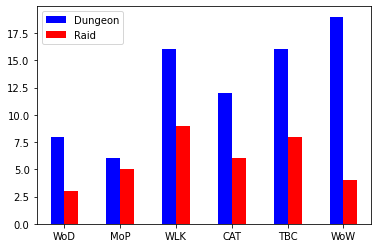

In [0]:
dung = df3.filter(df3['Location_Type']=='Dungeon').groupBy(df3['Game_Version']).count()
raid = df3.filter(df3['Location_Type']=='Raid').groupBy(df3['Game_Version']).count()

dBar = dung.select('count').rdd.flatMap(lambda x: x).collect()
rBar = raid.select('count').rdd.flatMap(lambda x: x).collect()
index = dung.select('Game_Version').rdd.flatMap(lambda x: x).collect()

df = pd.DataFrame({'Dungeon': dBar,
                   'Raid': rBar}, index=index)
ax = df.plot.bar(rot=0, color={"Dungeon": "Blue", "Raid": "Red"})